In [1]:
#split the task into multiple binary classification datasets and fit the model on each
#ONE vs ALL
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import load_digits

# load_digits dataset
the 8*8 images consists of:
10 classes, 180 samples per class

In [3]:
data = load_digits()

In [14]:
df = pd.DataFrame(data.data,columns=data.feature_names) #creating new data frame with iris samples' values
df['target']=data.target #add new column as species which gain the value from the target value of iris dataset
df.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [25]:
print(df.shape)
print(digits.data.shape)
print(digits.target.shape)
print(df.columns)

(1797, 65)
(1797, 64)
(1797,)
Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')


In [31]:
pixel_colnames= df.columns[:-1]
image_values=df.loc[0,pixel_colnames].values

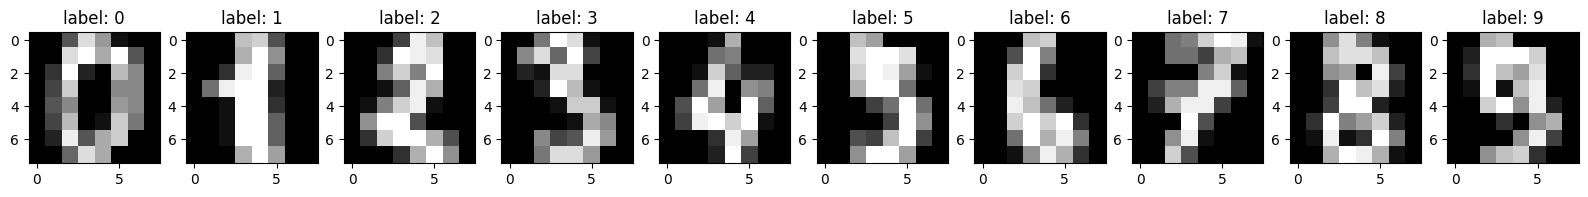

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

for index in range(10):
    plt.subplot(1, 10, index + 1)
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'target']
    plt.imshow(image_values.reshape(8, 8), cmap='gray')
    plt.title('label: ' + str(image_label))

plt.show()

In [54]:
#split data into training and test data
X = df[pixel_colnames]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=0)


In [55]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#multi class for one vs all

In [59]:
clf=LogisticRegression(solver='liblinear',
                       multi_class='ovr',
                       random_state=0)

In [60]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [61]:
print('training accuracy: ',clf.score(X_train,y_train) )
print('test accuracy: ',clf.score(X_test,y_test) )


training accuracy:  0.9881217520415738
test accuracy:  0.9622222222222222


In [62]:
clf.intercept_ #as we have 10 classes

array([-5.69916472, -6.36862266, -5.77396144, -5.984629  , -5.704684  ,
       -5.53911432, -5.83616519, -5.59445694, -5.35434071, -6.40743624])

In [64]:
clf.coef_.shape

(10, 64)

In [70]:
print('prediction',clf.predict(X_test[0:2]))
print('probability',clf.predict_proba(X_test[0:2]))

prediction [2 8]
probability [[3.09989428e-03 2.81366112e-04 9.78919573e-01 2.86678543e-04
  3.25224475e-04 8.61946161e-04 1.51854322e-05 1.57716815e-02
  1.99090531e-04 2.39360103e-04]
 [1.66719704e-04 8.52852376e-04 2.55026086e-02 7.87151615e-07
  4.04350835e-01 3.16693349e-03 4.81066158e-04 1.74090612e-05
  5.62190254e-01 3.27053430e-03]]
